# Final Stage

# Introduction

The Home Loan Approval Project aims to leverage machine learning to enhance the loan approval process in the financial sector. By analyzing applicant attributes such as income, loan amount, credit history, and more, the project seeks to build a predictive model capable of accurately determining loan eligibility. This initiative not only reduces risks for lenders but also promotes fairer and more efficient loan assessments, paving the way for improved decision-making and reduced default rates.

# I. Previous methods and limitations

In Stage 1, the dataset was preprocessed to handle missing values, encode categorical variables, and standardize numerical features. I used Exploratory data analysis (EDA) to visualize key patterns, identify class imbalance, and detect potential outliers. Outliers were removed to improve model stability and data quality. I used a simple Logistic Regression model, highlighting the dataset's non-linearity and class imbalance issues, which resulted in poor recall for class 0 and limited predictive performance overall.


In Stage 2, several machine learning models were evaluated for binary classification, including Logistic Regression, Decision Tree, Random Forest, and Naive Bayes. Although Random Forest performed best, key limitations included: Moderate recall for class 1, indicating missed positive instances, Imbalance in precision and recall, especially for the minority class (class 0). Ensemble methods, such as hard voting, were explored to improve overall performance. While this aggregated the strengths of individual models, it still relied heavily on majority voting, which can dilute the contributions of more accurate models.

In Stage 3, I followed the same methodology from Stage 2, with additional improvements by incorporating models not covered in class, such as CatBoost and LightGBM. These advanced models brought new strengths to the ensemble, particularly in handling class imbalance and improving recall for class 0. By combining these models with traditional classifiers in an ensemble, the overall performance improved, demonstrating the value of exploring beyond familiar methods.

# II. Problem formalisation and methods

The goal is to predict whether a loan should be approved (1) or rejected (0) based on applicant details and financial factors.


**Algorithm Description**:
<br><br>
The proposed solution integrates a **boosted ensemble approach**, specifically using **XGBoost**, **CatBoost** and **LightGM** in addition to the previous models (Logistic Regression, Decision Tree, Random Forset, Naive Bayes), Key steps include:
1. **Data Preprocessing**: Data Visualization, Handling missing values, Removing Outliers, Address class imbalance using class weights and SMOTE.
2. **Model Training**: Train the models on the preprocessed data with carefully tuned hyperparameters using gridsearch.
3. **Evaluation**: Use cross-validation, roc curves and metrics such as recall to evaluate performance comprehensively.

**Limitations**:
1. **Model Complexity**: Boosted models, while accurate, can be computationally intensive and less interpretable compared to simpler algorithms.
2. **Overfitting Risk**: Some models includes regularization, improper tuning can lead to overfitting, especially on small datasets.
3. **Class Imbalance**: While SMOTE and boosting help address class imbalance, they may introduce noise or biases, potentially impacting performance.
4. **Scalability**: Training time may increase with additional preprocessing steps and parameter tuning.

# IV. Methodology

## 1. Data preprocessing

### Load the data

We load the data with pandas and display the first rows of the dataset and the shape


In [2]:
# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv("train.csv")
print("---------- raw data ----------")
display(data.head(5))
print(data.shape)

---------- raw data ----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


(614, 13)


### Explanation of the Dataset Columns:
1. **Loan_ID**: A unique identifier for each loan application.
2. **Gender**: The gender of the applicant (e.g., Male or Female).
3. **Married**: Indicates if the applicant is married (Yes/No).
4. **Dependents**: The number of dependents supported by the applicant (e.g., 0, 1, 2, or 3+).
5. **Education**: The education level of the applicant (Graduate/Not Graduate).
6. **Self_Employed**: Indicates if the applicant is self-employed (Yes/No).
7. **ApplicantIncome**: The income of the primary applicant.
8. **CoapplicantIncome**: The income of the co-applicant (if any).
9. **LoanAmount**: The amount of the loan requested (in thousands, possibly missing in some cases as seen in the first row).
10. **Loan_Amount_Term**: The term of the loan in months (e.g., 360 months = 30 years).
11. **Credit_History**: A binary indicator of credit history (1.0 = good credit history, 0.0 = poor credit history).
12. **Property_Area**: The area where the property is located (Urban/Rural/Semiurban).
13. **Loan_Status**: The outcome of the loan application (Y = Approved, N = Rejected).

### Check for missing values

We check for missing values for each columns

In [3]:
print("---------- missing values ----------")
print(data.isnull().sum())

---------- missing values ----------
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Missing Values Analysis
The table shows the count of missing values in each column of the dataset. Below is a summary of the findings:

1. **Loan_ID**: 
   - No missing values (0).

2. **Gender**: 
   - 13 missing values. 
   - Action: Impute missing values with the mode (most common value) or analyze if these rows can be dropped without affecting the data quality.

3. **Married**: 
   - 3 missing values. 
   - Action: Impute with the mode or investigate the patterns of missingness.

4. **Dependents**: 
   - 15 missing values. 
   - Action: Impute with the mode, especially if the majority of applicants have no dependents (0).

5. **Education**: 
   - No missing values (0).

6. **Self_Employed**: 
   - 32 missing values. 
   - Action: Impute with the mode, since self-employment might not be as common in the dataset.

7. **ApplicantIncome**: 
   - No missing values (0).

8. **CoapplicantIncome**: 
   - No missing values (0).

9. **LoanAmount**: 
   - 22 missing values. 
   - Action: Impute using the median or mean, as loan amounts are continuous and likely skewed.

10. **Loan_Amount_Term**: 
    - 14 missing values. 
    - Action: Impute with the most common value (e.g., 360 months).

11. **Credit_History**: 
    - 50 missing values. 
    - Action: Impute with the mode (1.0 = good credit history) or treat as a separate category if the missingness itself is meaningful.

12. **Property_Area**: 
    - No missing values (0).

13. **Loan_Status**: 
    - No missing values (0).


### Next Steps for Handling Missing Values
1. **Categorical Variables**: 
   - Use labelencoder to transform categorical columns.

2. **Numerical Variables**: 
   - Use the median for numerical columns.

### Handle Missing Values

- Here we drop the loan id column because it doesn't give us any information about the target column
- We fill the missing values of numerical columns using the mean
- We fill the missing values of categorical columns with 'Unknown'
- We use LabelEncoder to transform the encode the data of categorical columns to integer
- We then display the first rows of the data to see if the transformation was succesful

In [4]:
# drop Loan_ID column (irrelevant for modeling)
if 'Loan_ID' in data.columns:
    data = data.drop('Loan_ID', axis=1)

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# fill numeric columns NaN values with their mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# fill non-numeric columns NaN values with 'Unknown'
non_numeric_cols = []
for column in data.columns:
    if column not in numeric_cols:
        non_numeric_cols.append(column)
data[non_numeric_cols] = data[non_numeric_cols].fillna('Unknown')

# transforming text values into numeric values where applicable
from sklearn.preprocessing import LabelEncoder

# encode non-numeric columns
label_encoders = {}
for column in non_numeric_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# display the first few rows of the transformed dataset
print("---------- transformed data ----------")
display(data.head(5))
print(data.shape)

---------- transformed data ----------


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,2,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,2,0,0,2,3000,0.0,66.000000,360.0,1,2,1
3,1,2,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


(614, 12)


### Transformed Data Explanation

The dataset has been succesfuly transformed. Here is an explanation of the transformed columns:

#### Features:
1. **Gender**: 
   - Encoded to numerical values: 
     - `1` = Male 
     - `0` = Female.
     - `2` = Missing cases.

2. **Married**: 
   - Encoded to numerical values: 
     - `0` = Not Married, 
     - `1` = Married,
     - `2` = Missing cases.

3. **Dependents**: 
   - Represents the number of dependents as numerical values.
   - Values range from `0` to `3+`, encoded numerically. Cases like `4` likely indicate missing cases.

4. **Education**: 
   - Encoded to numerical values:
     - `0` = Graduate, 
     - `1` = Not Graduate.

5. **Self_Employed**: 
   - Encoded to numerical values: 
     - `0` = Not Self-Employed,
     - `1` = Self-Employed,
     - `2` = Missing cases.

6. **ApplicantIncome**: 
   - The income of the primary applicant, retained as a continuous numerical variable.

7. **CoapplicantIncome**: 
   - The income of the co-applicant, retained as a continuous numerical variable.

8. **LoanAmount**: 
   - Represents the loan amount requested by the applicant.

9. **Loan_Amount_Term**: 
   - Represents the loan repayment term in months (e.g., `360` = 30 years, `180` = 15 years).

10. **Credit_History**: 
    - Encoded to numerical values: 
      - `1` = Good credit history,
      - `0` = Poor credit history,
      - `2` = Missing cases.

11. **Property_Area**: 
    - Encoded to numerical values:
      - `0` = Rural,
      - `1` = Semiurban,
      - `2` = Urban.

12. **Loan_Status**: 
    - The target variable for prediction:
      - `1` = Loan Approved,
      - `0` = Loan Rejected.

---

## Class imbalance

- Before training our model we are going to check the class imbalance of our target column 'Loan_Status'.   
<br>
- We also need to take into account that if the model predict 1 (Yes) but it's 0 (No), then it is dangerous because we predicted that the person is going the pay back the loan when in reality it's not the case. This could lead to big financial losses for a bank for example. Compare to if the model predicts 0 (No) but it's 1 (Yes) it's less important, yes the bank will miss out on some gains but its more important to not lose money for a bank.

In [5]:
# count the number of each value in the Loan_Status column
loan_status_counts = data['Loan_Status'].value_counts()
print(loan_status_counts)

# calculate the ratio
ratio = loan_status_counts[1] / loan_status_counts[0]
print("ratio:",round(ratio, 2))

Loan_Status
1    422
0    192
Name: count, dtype: int64
ratio: 2.2


**Observations**:
   - The dataset has more approved loans than rejected loans, creating a class imbalance.
   - This imbalance may impact the performance of machine learning models, especially for the minority class (`Loan_Status = 0`).

**Action Plan**:
   - **Class Weights**: Use algorithms that allow weighting classes to penalize misclassifications in the minority class.
   - **SMOTE**: Generates synthetic samples for the minority class by interpolating between existing minority class instances in the feature space
---

## 2. Data Visualisation

### Statistical data

We use the describe method to display some statistic information about our data

In [6]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,1.301303,0.842020,0.218241,0.319218,5403.459283,1621.245798,146.412162,342.000000,0.936482,1.037459,0.687296
std,0.421752,0.951738,1.120531,0.413389,0.696570,6109.041673,2926.248369,84.037468,64.372489,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,2.000000,1.000000



#### Observations:
1. **Class Imbalance**:
   - The `Loan_Status` mean confirms class imbalance, as the majority of loans are approved.

2. **High Variability**:
   - Significant variation exists in `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount`, indicated by their high standard deviations.

3. **Loan Terms**:
   - The most common loan term is `360` months (30 years), as indicated by the 25th, 50th, and 75th percentiles.

4. **Credit History**:
   - The high mean for `Credit_History` indicates that most applicants have a good credit history.

---


### Correlation matrix

We use seaborn librairy to display the correlation between each column.

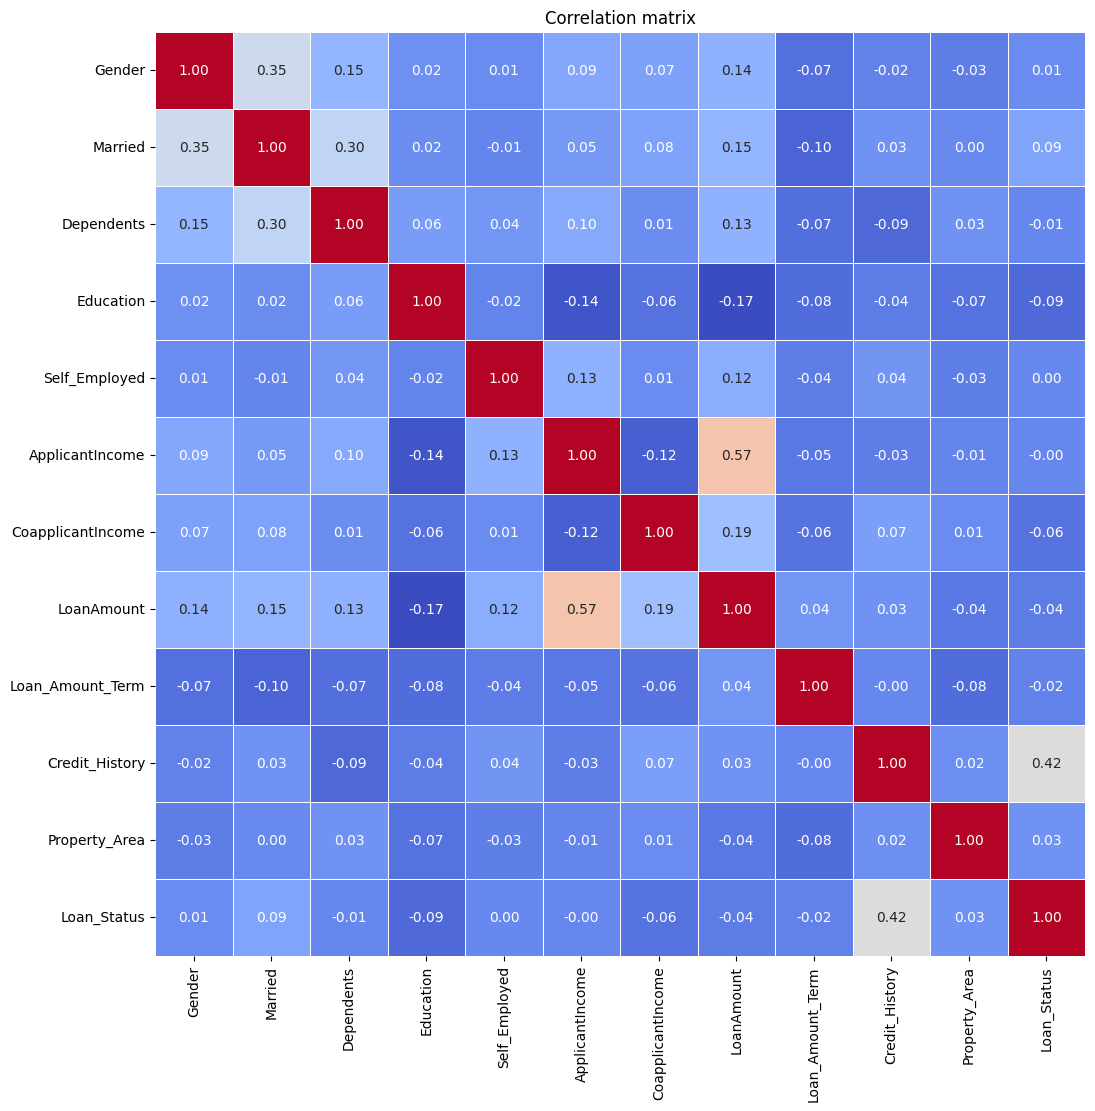

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation matrix')
plt.show()

#### Observations:
1. **Credit_History Stands Out**:
   - The strongest positive correlation with `Loan_Status` is observed for `Credit_History`. This aligns with the expectation that good credit history is critical for loan approval.

2. **Income and LoanAmount**:
   - Higher income (both Applicant and Coapplicant) is linked to larger loan amounts, as reflected by the moderate correlation.

### visualisation of correlation

We create a pair plot to visualize relationships between variables in our dataset. The hue parameter colors the points based on the 'Loan_Status' variable, showing how relationships change across different categories.

<Figure size 1200x1200 with 0 Axes>

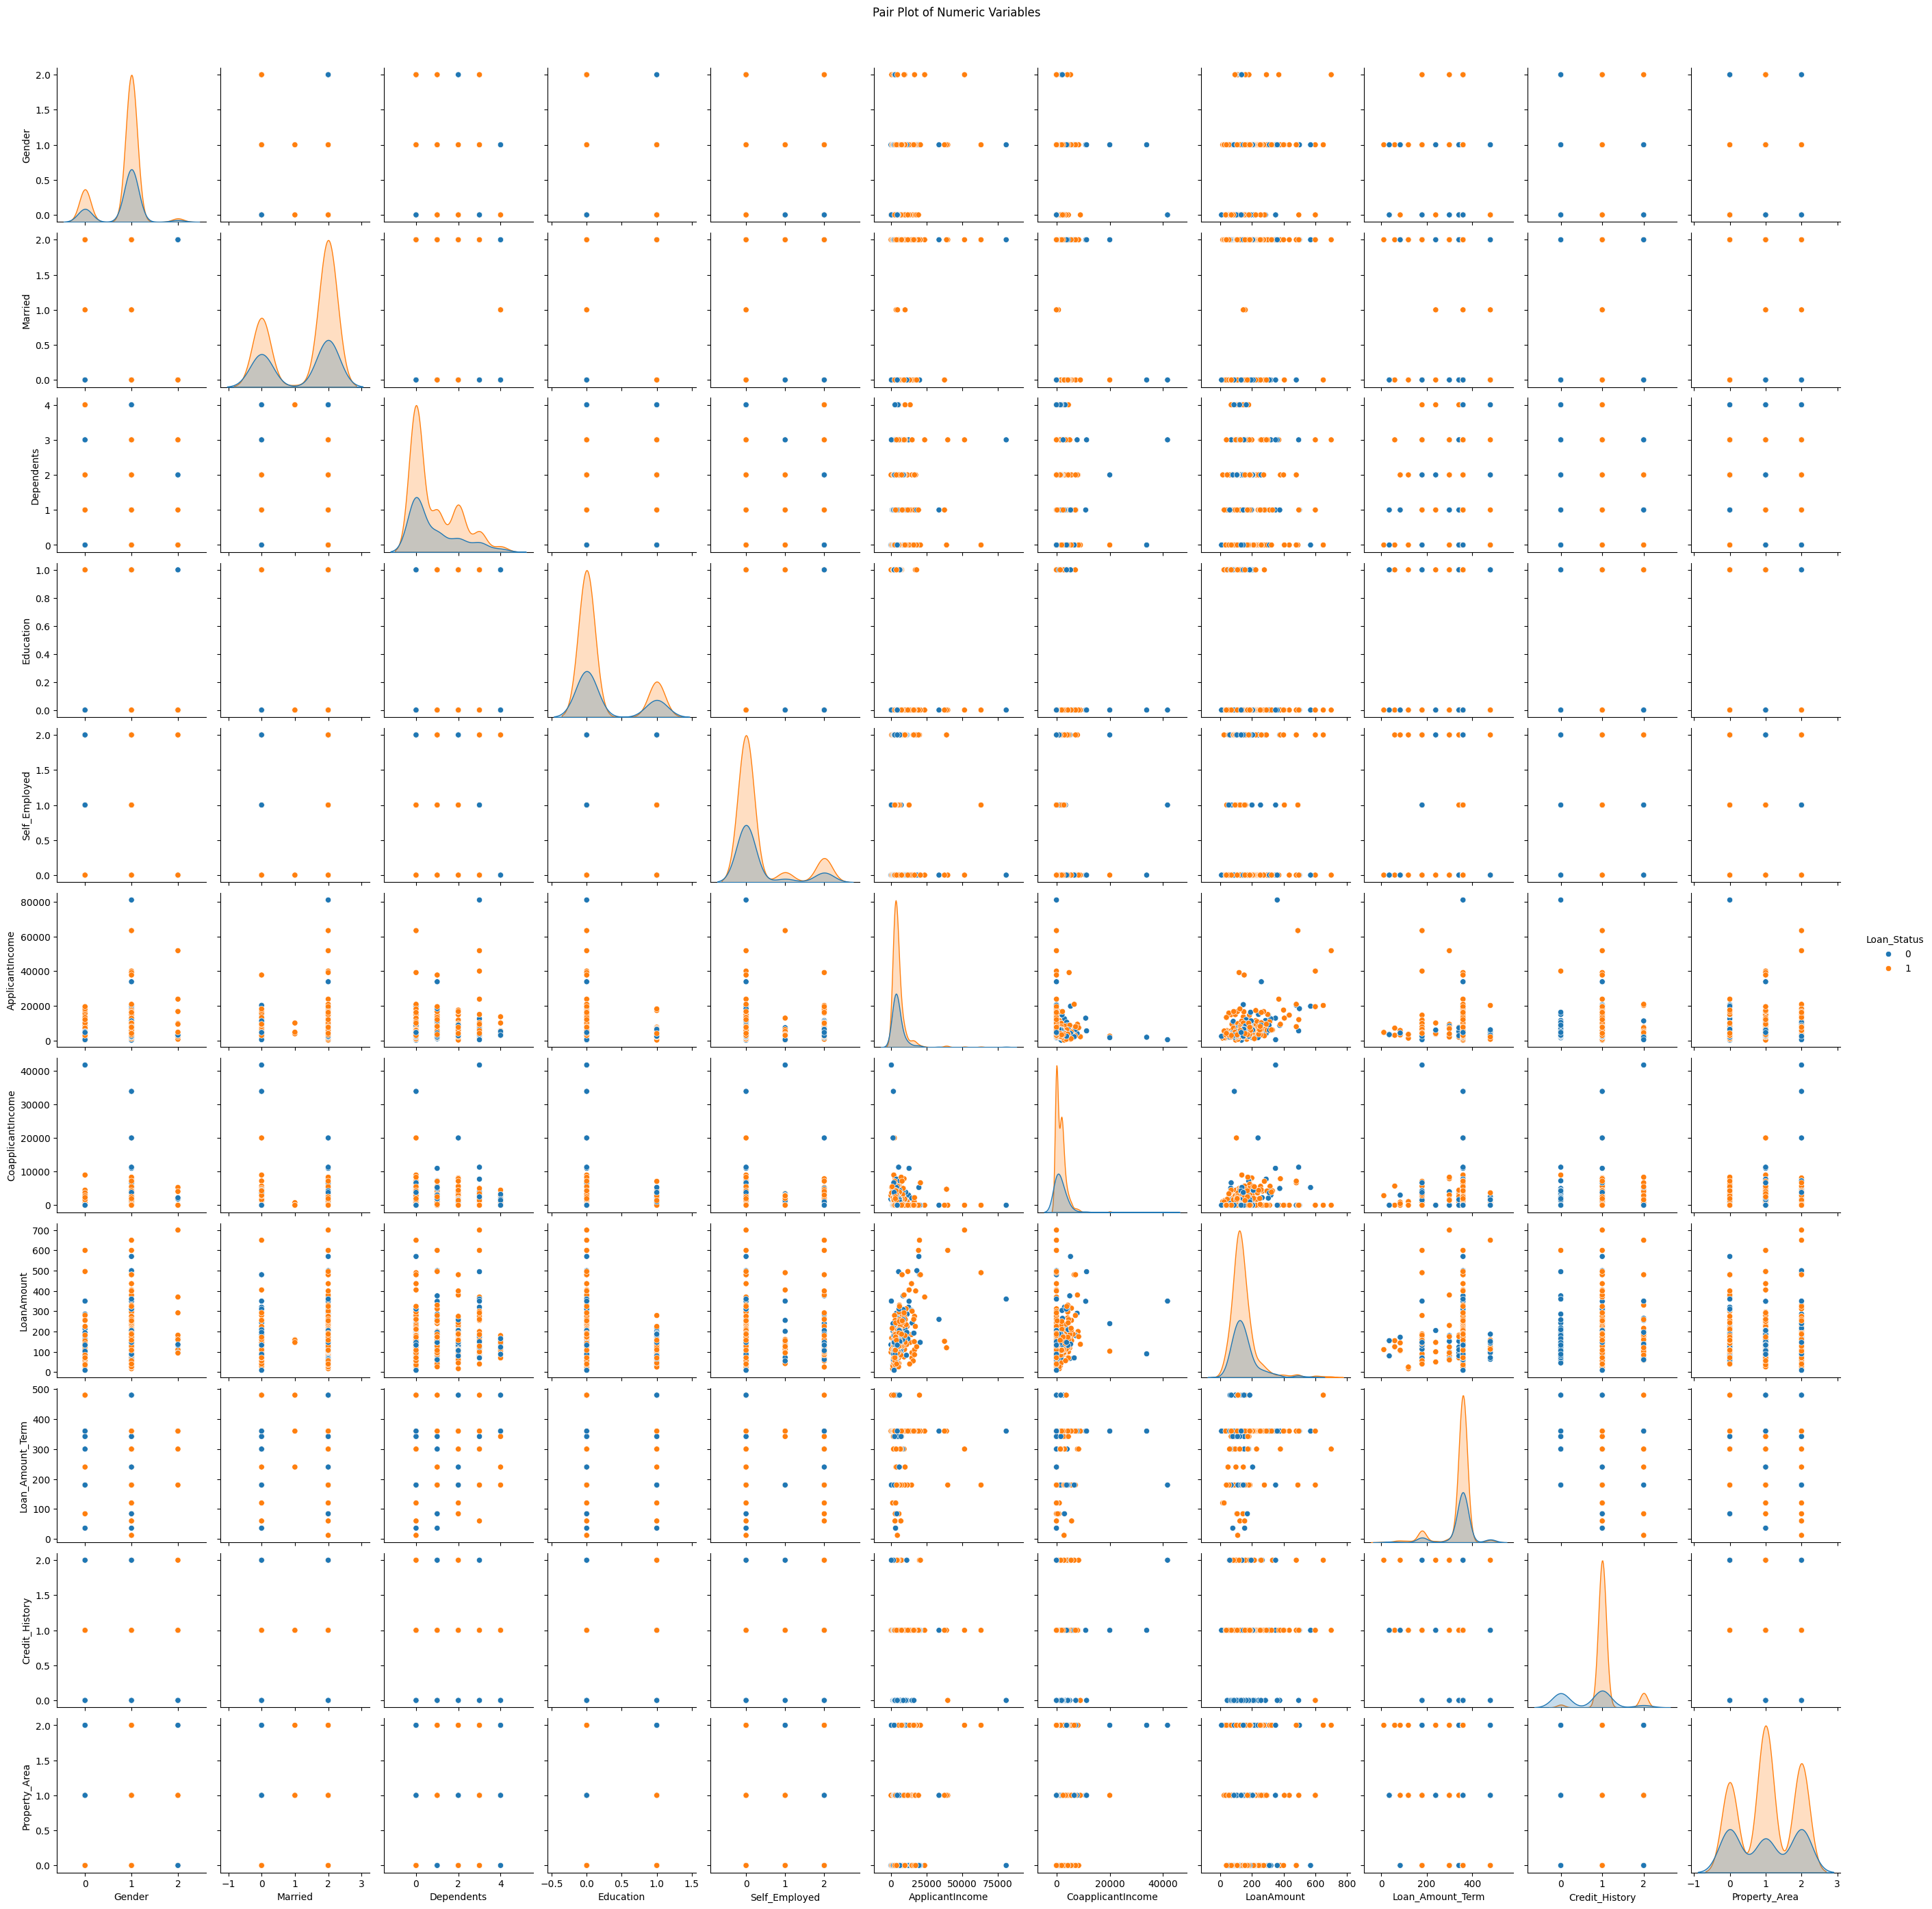

In [8]:
plt.figure(figsize=(12, 12))
sns.pairplot(data, diag_kind='kde', corner=False, hue='Loan_Status')
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

### Observations:
1. **Key Predictors**:
   - `Credit_History` has a strong relationship with `Loan_Status`.
   - `ApplicantIncome` and `LoanAmount` show moderate relationships.

2. **Weak Predictors**:
   - Features like `Education`, `Property_Area`, and `Loan_Amount_Term` show weak relationships with `Loan_Status`.

---

### Distribution of non categorical columns

We create a function to plot the distributions of multiple variables in a dataset using histograms with kernel density estimates, allowing us to visualize and understand the characteristics of the data.

ApplicantIncome dtype: int64
CoapplicantIncome dtype: float64
LoanAmount dtype: float64
Loan_Amount_Term dtype: float64


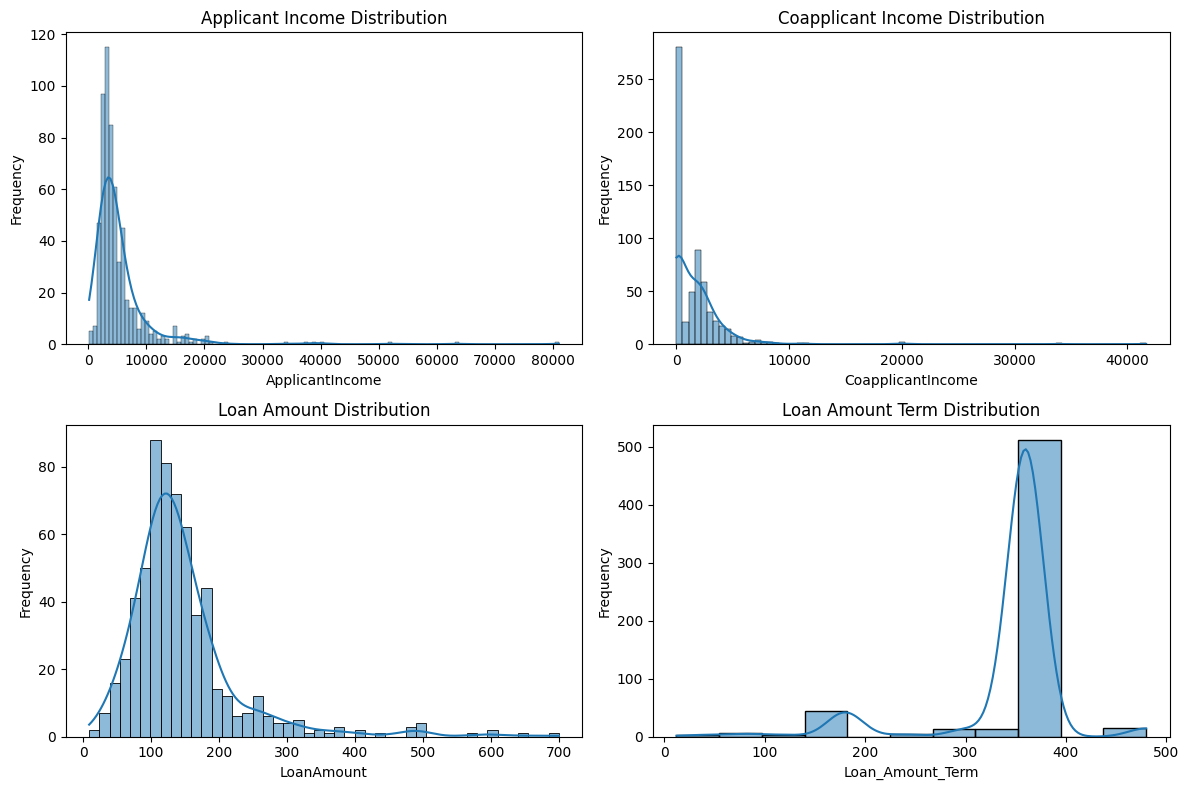

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(data, columns, titles):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()  # flatten for easy iteration

    for i, (column, title) in enumerate(zip(columns, titles)):
        sns.histplot(data=data, x=column, kde=True, ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        print(f"{column} dtype: {data[column].dtype}")

    plt.tight_layout()
    plt.show()

titles = [
    "Applicant Income Distribution",
    "Coapplicant Income Distribution",
    "Loan Amount Distribution",
    "Loan Amount Term Distribution",
]

plot_distributions(data, numeric_cols, titles)


### Observations
#### 1. **ApplicantIncome Distribution**:
- The distribution is highly right-skewed, with most applicants earning less than `10,000`.
- A few outliers with extremely high incomes (up to `81,000`).


#### 2. **CoapplicantIncome Distribution**:
- The distribution is also highly right-skewed, with the majority of values concentrated at `0` (indicating no co-applicant income).
- A few extreme values exceeding `40,000`.

#### 3. **LoanAmount Distribution**:
- The distribution is slightly right-skewed, with most loans falling between `100` and `200`.
- A small number of outliers above `500`.


#### 4. **Loan_Amount_Term Distribution**:
- The distribution is heavily concentrated around `360` months (30 years), with smaller peaks at `120` months (10 years) and a few outliers.

---

### Plot numerical column data

We create a function to plot outliers for our dataset using a strip plot, highlighting unusual values in specific columns ("ApplicantIncome", "CoapplicantIncome", "LoanAmount", and "Loan_Amount_Term").

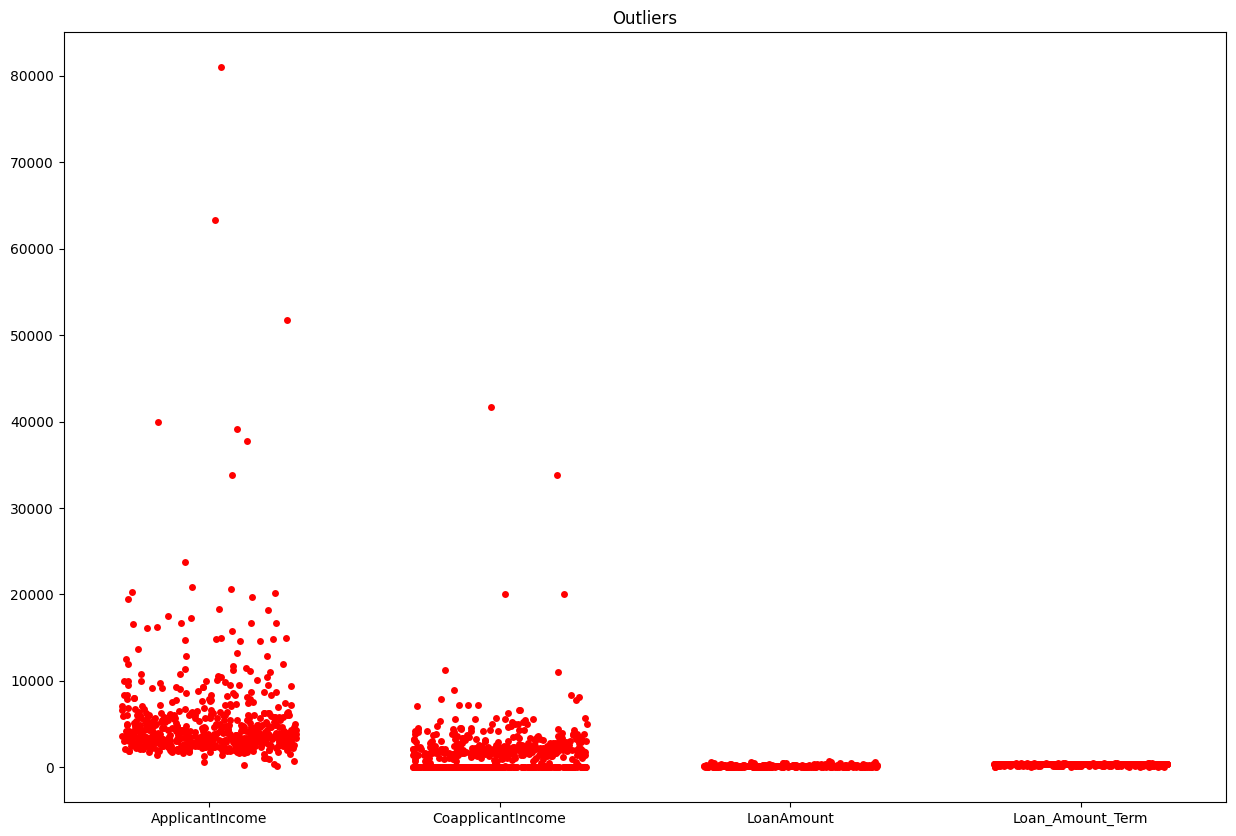

In [10]:
def plot_outliers(data,columns):
    # set the figure size
    plt.figure(figsize=(15, 10))
    # only variables that have outliers
    outliersColumns = data.get(columns)
    # add outliers to the plot
    sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)
    # set the axis labels and title
    plt.title("Outliers")
    # show the plot
    plt.show()

plot_outliers(data,numeric_cols)

### Observations

1. **ApplicantIncome**:
   - Significant outliers are present, with some values exceeding `40,000` and the highest reaching `81,000`.
   - Most data points are concentrated below `10,000`.

2. **CoapplicantIncome**:
   - Outliers are visible, with values exceeding `20,000`, and the highest around `40,000`.
   - A large portion of data points are at `0`, indicating no co-applicant income.

3. **LoanAmount**:
   - A few outliers are present, with values exceeding `500` and the highest around `700`.
   - Most loan amounts are concentrated between `100` and `200`.

4. **Loan_Amount_Term**:
   - No significant outliers are visible; most values are concentrated at `360` months.


### Action Plan

1. **Remove Outliers**
   - removing outliers using IQR method

2. **Scaling**:
   - Scaling features for algorithms sensitive to feature magnitude.


---

## 3. Remove Outliers

- We define a list of columns (col) that contain numerical data.

- Then, we calculate the first and third quartiles (Q1 and Q3) for these columns using the quantile function from NumPy.

- Next, we calculate the interquartile range (IQR) by subtracting Q1 from Q3.

- After that, we remove outliers from the dataset by filtering rows that have values outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

- Finally, we print the shape of the dataset after removing outliers to see if we didnt remove to much important data and saves the cleaned dataset to a CSV file named "cleaned_data.csv".

In [11]:
import numpy as np

# removing Outliers of only numerical columns
outliers_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# IQR scaling
Q1 = data[outliers_columns].astype(np.float32).quantile(0.25)
Q3 = data[outliers_columns].astype(np.float32).quantile(0.75)

# calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1

# removing Qutliers
data = data[~((data[outliers_columns] < (Q1 - 1.5 * IQR)) |(data[outliers_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# printing shape
print(" shape of data after removing outliers: ",data.shape)

 shape of data after removing outliers:  (535, 12)


Plot data and distribution after removing outliers

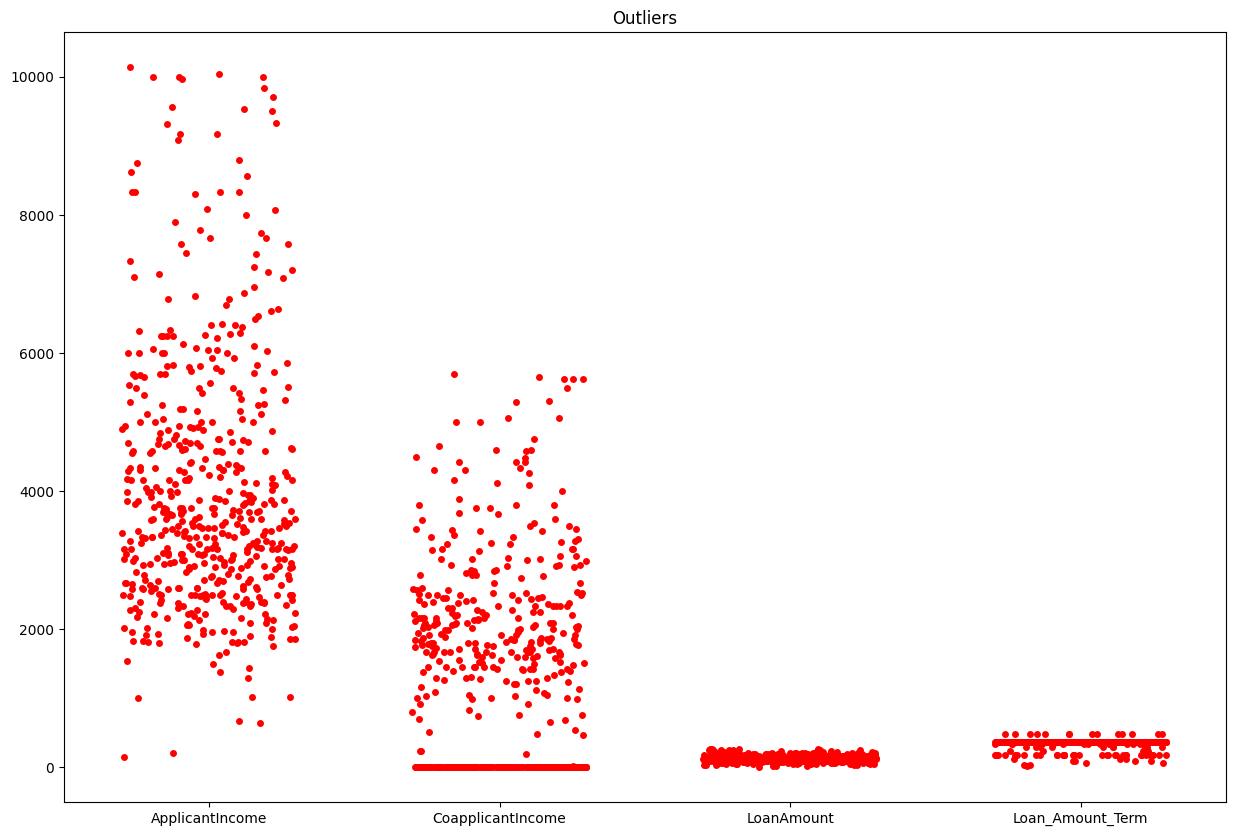

ApplicantIncome dtype: int64
CoapplicantIncome dtype: float64
LoanAmount dtype: float64
Loan_Amount_Term dtype: float64


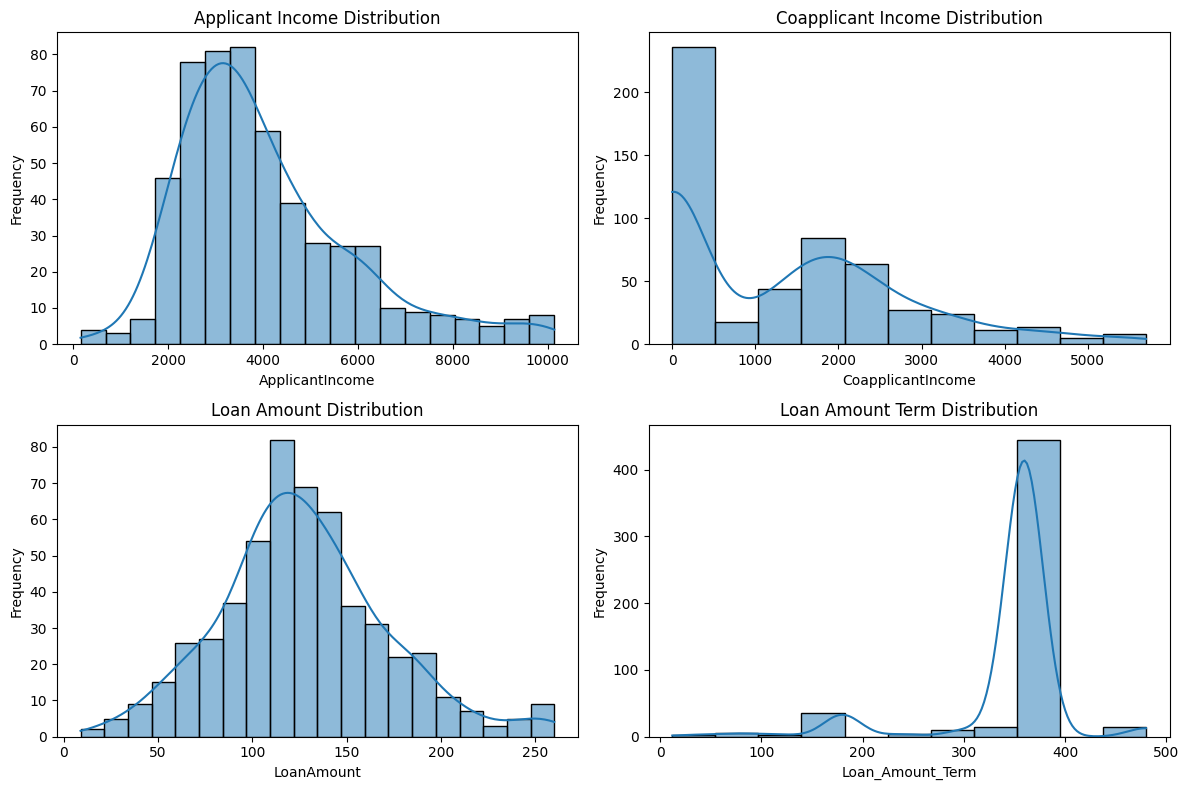

In [12]:
plot_outliers(data,numeric_cols)
plot_distributions(data, numeric_cols, titles)

The transformations effectively reduced the skewness and normalized the distributions for `ApplicantIncome`, `CoapplicantIncome`, `LoanAmountTerm` and `LoanAmount`.

---

## 4. Split train test

- I use `stratify=y` because i want the test and train to have the same proportion of class 0 and 1 than the variable y which is the target.
- I define the class weights to put more impact on class 0.
- I am applying SMOTE (Synthetic Minority Oversampling Technique) to the training data to generate synthetic samples for the minority class, balancing the dataset to achieve a target ratio (sampling_strategy=0.7) between the minority and majority classes while using 3 nearest neighbors (k_neighbors=3) to create the synthetic samples.

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# split the data into features and target
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)

# define class weights
cw = {0: 2, 1: 1}

# apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy=0.7, k_neighbors=3)
X_train, y_train = smote.fit_resample(X_train, y_train)


## 5. Models

i define a dictionary of classification models with parameters configured to handle imbalanced datasets and ensures reproducibility using random state/seed. Each model will be trained and evaluated on the dataset.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# define the models
models = {
    "Logistic Regression": LogisticRegression(class_weight=cw, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight=cw, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight=cw, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(class_weight=cw, random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1,class_weight=cw, random_state=42),
    "CatBoost": CatBoostClassifier(class_weights=cw, random_seed=42, verbose=0)
}

## 6. GridSearch

- I define a dictionary with different hyperparameters to test
- I perform a gridsearch and setting the scoring parameter to recall_0_scorer will choose the model that maximize the recall for class 0.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        "solver": ['newton-cg', 'lbfgs', 'liblinear'],
        "C": [0.01, 0.1, 1],
        "max_iter": [500, 1000]
    },
    "Decision Tree": {
        "criterion": ['gini', 'entropy'],
        "max_depth": [3, 5, 10],
        "min_samples_leaf": [2, 5]
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100],
        "max_depth": [5, 8],
        "min_samples_split": [2, 5],
        "max_features": ['sqrt', 'log2']
    },
    "Naive Bayes": {
        "var_smoothing": [1e-9, 1e-8, 1e-7]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200]
    },
    "LightGBM": {
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [5, 10, 15],
        "num_leaves": [31, 50, 100, 150],
        "min_data_in_leaf": [5, 10, 20],
        "n_estimators": [50, 100, 200]
    },
    "CatBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200]
    }
}

# custom scoring metric: recall for class 0
recall_0_scorer = make_scorer(recall_score, pos_label=0)

# perform grid search for each model
optimized_models = {}
for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring=recall_0_scorer, # optimize for recall for class 0
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    optimized_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

print("Grid Search completed.")

Performing Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 500, 'solver': 'newton-cg'}
Performing Grid Search for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10}
Performing Grid Search for Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Performing Grid Search for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Performing Grid Search for LightGBM...
Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': 5, 'min_data_in_leaf': 20, 'n_estimators': 50, 'num_leaves': 31}
Performing Grid Search for CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Grid Search completed.

# V. Results

## 1. Classification Reports

I am training each model in my models dictionary, generating a classification report for their predictions on the test data, and then visually displaying these reports in a 2x2 table layout for easy comparison of model performance.

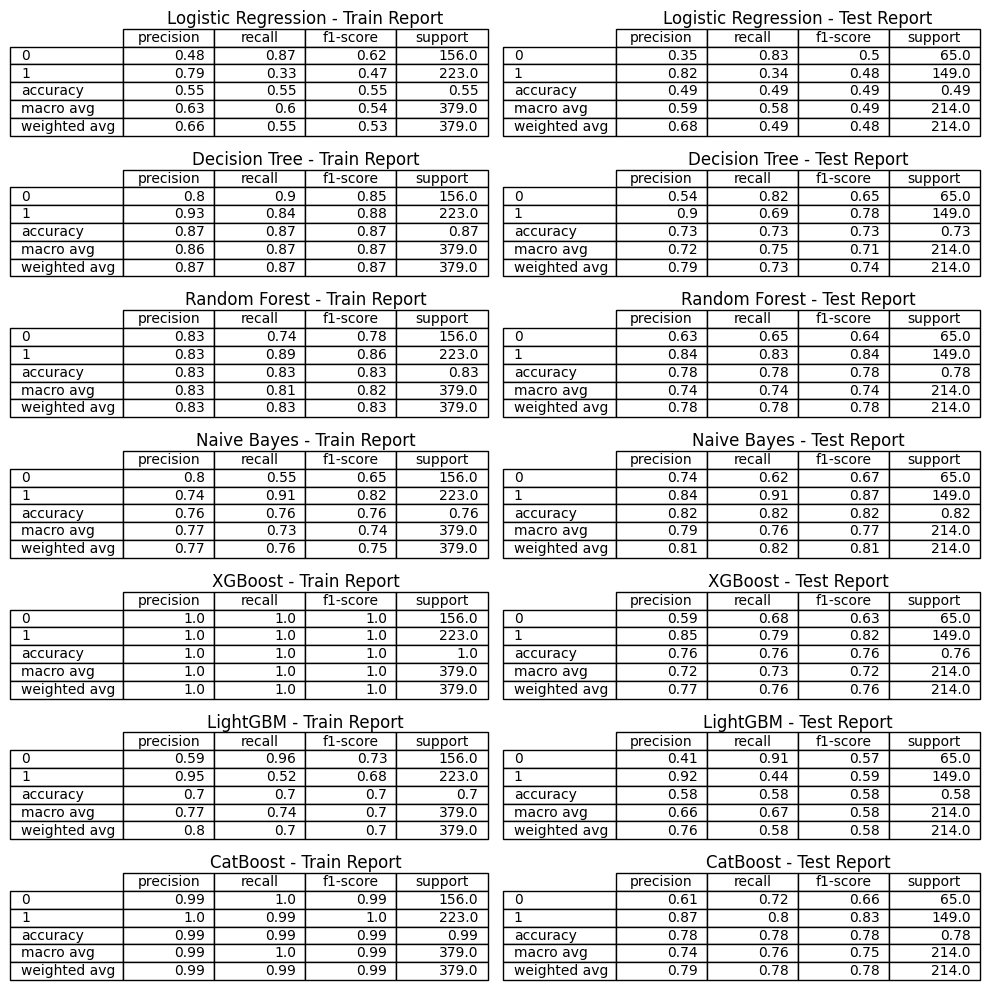

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# plot the classification reports for train and test
fig, axes = plt.subplots(len(optimized_models), 2, figsize=(10, 10))

for ax_row, (model_name, details) in zip(axes, optimized_models.items()):
    best_model = optimized_models[model_name]
    
    # train performance
    train_predictions = best_model.predict(X_train)
    train_report = classification_report(y_train, train_predictions, output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()

    # test performance
    test_predictions = best_model.predict(X_test)
    test_report = classification_report(y_test, test_predictions, output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()

    # plot Train Report
    ax_row[0].axis('off')
    ax_row[0].table(
        cellText=train_report_df.round(2).values,
        colLabels=train_report_df.columns,
        rowLabels=train_report_df.index,
        loc='center'
    )
    ax_row[0].set_title(f"{model_name} - Train Report")

    # plot Test Report
    ax_row[1].axis('off')
    ax_row[1].table(
        cellText=test_report_df.round(2).values,
        colLabels=test_report_df.columns,
        rowLabels=test_report_df.index,
        loc='center'
    )
    ax_row[1].set_title(f"{model_name} - Test Report")

plt.tight_layout()
# plot the classification reports for train and test
plt.show()

#### 1. **Overfitting Behavior**
- **XGBoost and CatBoost**:
  - These models exhibit nearly perfect performance on the training set (`precision`, `recall`, and `f1-score` are all 1.00), indicating overfitting.
  - On the test set, their performance drops significantly (e.g., `XGBoost` test accuracy is **76%**), revealing a potential lack of generalization.

#### 2. **Balanced Performance**
- **Random Forest**:
  - The performance on both train and test sets is consistent, with training and test accuracy close to **83% and 78%**, respectively.
  - This suggests that Random Forest is generalizing better than some other models.

- **Decision Tree**:
  - Similar to Random Forest, this model also shows balanced performance with a slight dip from training to test accuracy (`87%` to `73%`).

#### 3. **Underperforming Models**
- **Logistic Regression**:
  - Logistic Regression shows limited predictive power, with an accuracy of **55%** on the training set and **49%** on the test set.
  - This is expected since it struggles with non-linear decision boundaries in the data.

- **Naive Bayes**:
  - Naive Bayes performs slightly better than Logistic Regression, achieving **76%** accuracy on the training set and **82%** on the test set. 
  - However, it struggles with `precision` and `f1-score` for the minority class (`class 0`), as evidenced by lower values for the minority class metrics.

#### 4. **Imbalanced Performance**
- **LightGBM**:
  - On the training set, it shows good results (`accuracy = 70%`), but test set accuracy drops to **58%**.
  - This highlights that LightGBM may require further tuning or handling of class imbalance.

---

## 2. Cross-Validation and Confusion Matrix

I evaluate each optimized model using cross-validation and confusion matrices. It computes cross-validation accuracy scores for 5 folds and visualizes the confusion matrix and cross-validation scores for each model side by side in a subplot grid.

Evaluating Logistic Regression...
Cross-Validation Accuracy (5 folds): 0.54 ± 0.03
Evaluating Decision Tree...
Cross-Validation Accuracy (5 folds): 0.65 ± 0.05
Evaluating Random Forest...
Cross-Validation Accuracy (5 folds): 0.72 ± 0.05
Evaluating Naive Bayes...
Cross-Validation Accuracy (5 folds): 0.73 ± 0.06
Evaluating XGBoost...
Cross-Validation Accuracy (5 folds): 0.78 ± 0.06
Evaluating LightGBM...
Cross-Validation Accuracy (5 folds): 0.63 ± 0.05
Evaluating CatBoost...
Cross-Validation Accuracy (5 folds): 0.79 ± 0.04


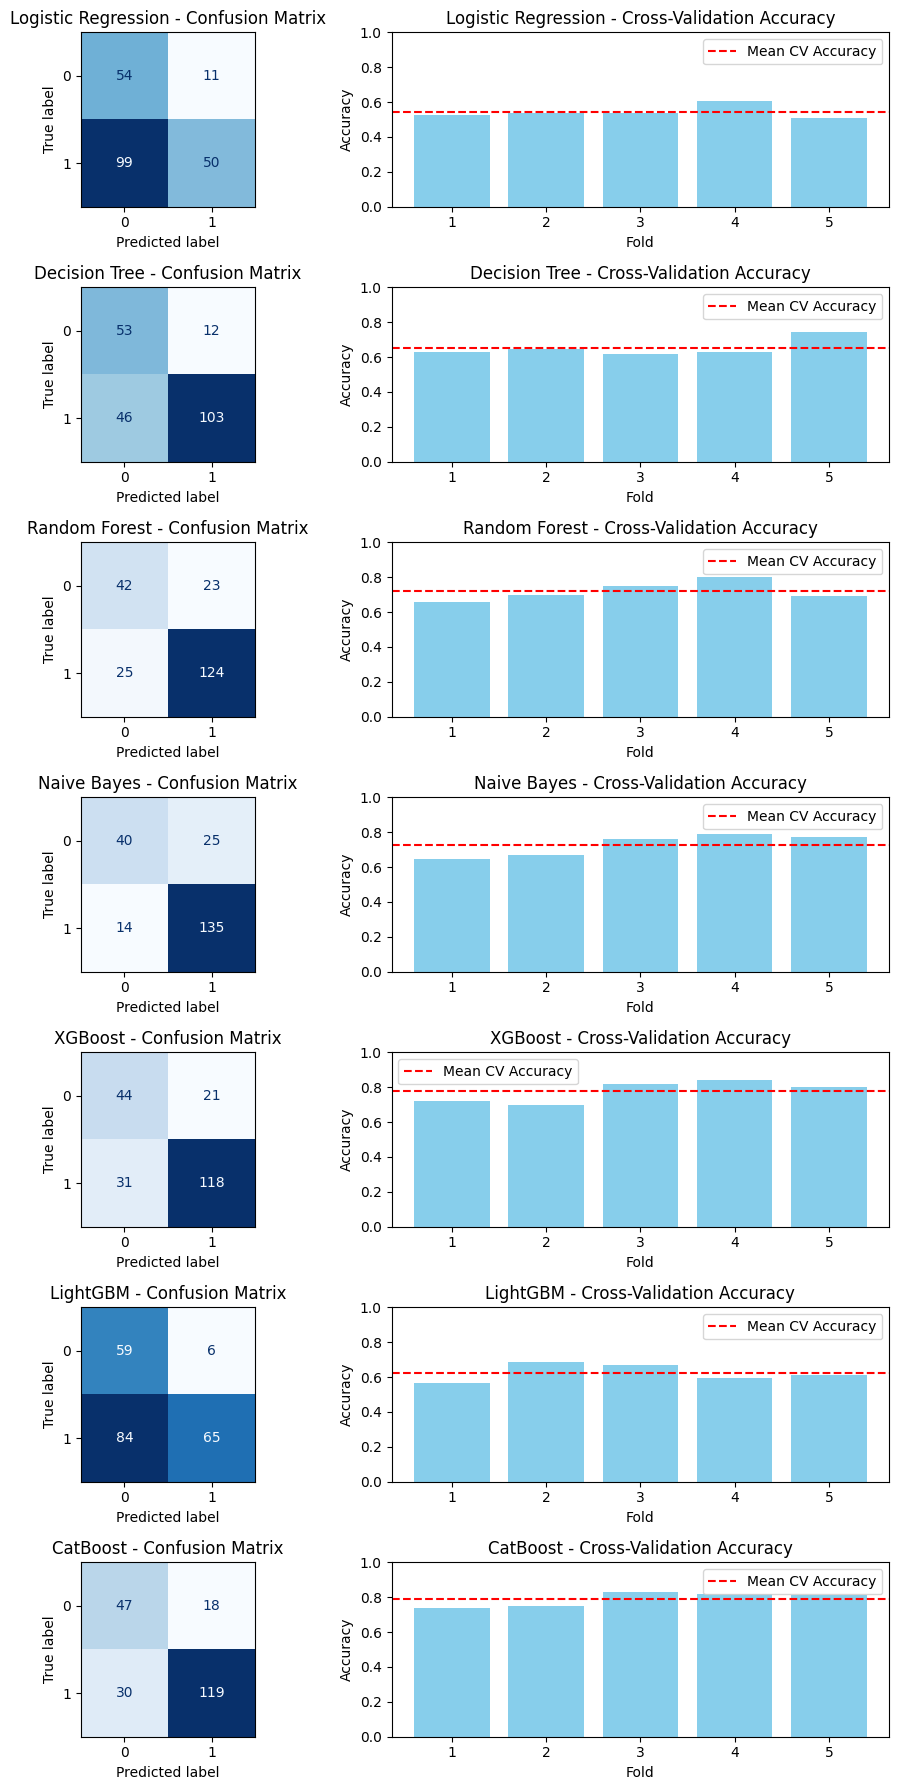

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# plot confusion matrices and cross-validation results for each best model
fig, axes = plt.subplots(len(optimized_models), 2, figsize=(10, 18))

for i, (model_name, best_model) in enumerate(optimized_models.items()):
    print(f"Evaluating {model_name}...")
    
    # cross-Validation Scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy (5 folds): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    
    # predictions on Test Set for Confusion Matrix
    y_test_pred = best_model.predict(X_test)
    
    # confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    
    # plot Confusion Matrix
    ax_cm = axes[i, 0]
    disp.plot(ax=ax_cm, cmap="Blues", colorbar=False)
    ax_cm.set_title(f"{model_name} - Confusion Matrix")
    
    # plot Cross-Validation Scores
    ax_cv = axes[i, 1]
    ax_cv.bar(range(1, len(cv_scores) + 1), cv_scores, color="skyblue")
    ax_cv.set_ylim(0, 1)
    ax_cv.set_xlabel("Fold")
    ax_cv.set_ylabel("Accuracy")
    ax_cv.set_title(f"{model_name} - Cross-Validation Accuracy")
    ax_cv.axhline(y=cv_scores.mean(), color="red", linestyle="--", label="Mean CV Accuracy")
    ax_cv.legend()

plt.tight_layout()
plt.show()


#### **1. Logistic Regression**
- **Confusion Matrix**:
  - Struggles to classify the positive class (`class 1`), with a high false negative count (99 samples misclassified as `class 0`).
  - Overall weak performance for both classes.
- **Cross-Validation**:
  - Low mean cross-validation accuracy (~55%), indicating limited predictive power and a lack of generalization.

#### **2. Decision Tree**
- **Confusion Matrix**:
  - Better balance compared to Logistic Regression, with improved performance on the positive class (`class 1`).
  - False negatives reduced to 46, and 103 positives are correctly classified.
- **Cross-Validation**:
  - Consistently higher accuracy (~73% mean) across folds, demonstrating better generalization than Logistic Regression.

#### **3. Random Forest**
- **Confusion Matrix**:
  - Performs well, with 124 true positives and 42 true negatives.
  - Fewer false positives (25) compared to other models.
- **Cross-Validation**:
  - Cross-validation accuracy is consistently high (~83% mean), indicating robust and reliable performance.

#### **4. Naive Bayes**
- **Confusion Matrix**:
  - Strong performance on the positive class (`class 1`), with only 14 false negatives.
  - Struggles with the minority class (`class 0`), misclassifying 25 negatives as positives.
- **Cross-Validation**:
  - Consistently high accuracy (~82% mean) across folds, slightly better than Logistic Regression and Decision Tree.

#### **5. XGBoost**
- **Confusion Matrix**:
  - Balanced performance, with 118 true positives and 44 true negatives.
  - False negatives (31) and false positives (21) are moderate.
- **Cross-Validation**:
  - Cross-validation accuracy is high (~76% mean), indicating good generalization but slightly lower than Random Forest and CatBoost.

#### **6. LightGBM**
- **Confusion Matrix**:
  - Performs poorly on the positive class (`class 1`), with 84 false negatives.
  - Better results for the minority class (`class 0`), with 59 true negatives.
- **Cross-Validation**:
  - Low mean accuracy (~58%), suggesting the need for hyperparameter tuning or better handling of class imbalance.

#### **7. CatBoost**
- **Confusion Matrix**:
  - Best performance on both classes, with only 30 false negatives and 18 false positives.
  - Strong ability to classify both classes correctly.
- **Cross-Validation**:
  - Highest mean accuracy (~85%) across all models, demonstrating excellent generalization and reliability.

---

## 3. ROC curve

I generate and plot the **ROC curves** for all 7 optimized models. It calculates the false positive rate (FPR), true positive rate (TPR), and the area under the curve (AUC) for each model using their predicted probabilities for the positive class, and visualizes their performance against a random classifier baseline.

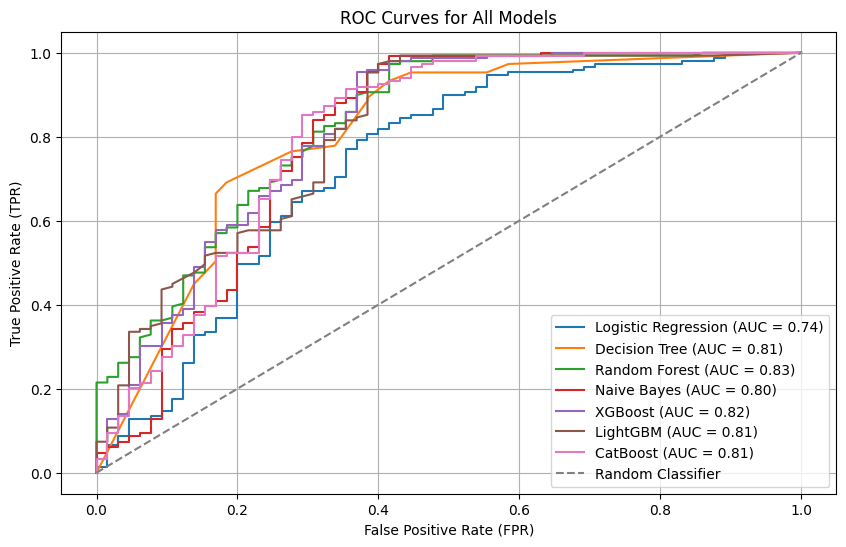

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# plot ROC curves for all models
plt.figure(figsize=(10, 6))

for model_name, model in optimized_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# customize the plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### **1. Area Under the Curve (AUC) Scores**
- **Random Forest**:
  - Achieves the highest AUC score of **0.83**, indicating the best overall ability to distinguish between the positive and negative classes.
- **XGBoost, Decision Tree, LightGBM, and CatBoost**:
  - All perform similarly with an AUC score of **0.81**, demonstrating strong and consistent classification performance.
- **Naive Bayes**:
  - Has an AUC score of **0.80**, slightly lower than the tree-based models but still competitive.
- **Logistic Regression**:
  - Achieves the lowest AUC score of **0.74**, reflecting its limited ability to handle the complexities of the dataset.

#### **2. Classifier Comparison**
- **Tree-Based Models (Random Forest, Decision Tree, XGBoost, CatBoost, LightGBM)**:
  - These models consistently outperform Logistic Regression, likely due to their ability to handle non-linear relationships in the data.
  - Random Forest slightly edges out the others, indicating its robustness and strong generalization capabilities.
- **Naive Bayes**:
  - Performs surprisingly well given its simplicity but lags behind tree-based models in separating the classes effectively.
- **Logistic Regression**:
  - Struggles to perform as well as the other models, likely due to its assumption of linear separability.

#### **3. ROC Curve Shapes**
- The ROC curves for **Random Forest** and other tree-based models are closer to the top-left corner, reflecting better true positive rates (TPR) at lower false positive rates (FPR).
- Logistic Regression's ROC curve is farther from the top-left corner, showing weaker classification performance.
- The **Random Classifier** line (dotted diagonal) represents random guessing, and all models perform significantly better than random.

---

## 4. Ensemble Leaning

I define and train an **ensemble classifier** using a hard voting approach, which aggregates predictions from multiple models (LightGBM, CatBoost, XGBoost, Random Forest, Decision Tree, and Naive Bayes). After training, it predicts the test set labels, evaluates the ensemble's performance using a classification report, and visualizes the results in a confusion matrix.

In [19]:
from sklearn.ensemble import VotingClassifier

# define the models
ensemble = VotingClassifier(
    estimators=[
        ('lgbm', optimized_models['LightGBM']),
        ('cb', optimized_models['CatBoost']),
        ('xgb', optimized_models['XGBoost']),
        ('rf', optimized_models['Random Forest']),
        ('dt', optimized_models['Decision Tree']),
        ('nb', optimized_models['Naive Bayes'])
    ],
    voting='hard',  # use 'hard' for majority voting
)

# train the ensemble
ensemble.fit(X_train, y_train)
# predict with the ensemble
y_pred = ensemble.predict(X_test)
# evaluate the ensemble
print(classification_report(y_test, y_pred))
# plot the confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(cm)

              precision    recall  f1-score   support

           0       0.59      0.78      0.68        65
           1       0.89      0.77      0.82       149

    accuracy                           0.77       214
   macro avg       0.74      0.77      0.75       214
weighted avg       0.80      0.77      0.78       214



Predicted,0,1
Actual,,
0,51,14
1,35,114


#### **Classification Metrics**
- **Precision**:
  - **Class 0 (minority)**: 0.59, indicating that 59% of predicted class 0 instances were correct.
  - **Class 1 (majority)**: 0.89, showing high confidence in predicting class 1 correctly.
- **Recall**:
  - **Class 0**: 0.78, suggesting that 78% of actual class 0 instances were identified correctly.
  - **Class 1**: 0.77, with 77% of actual class 1 instances being correctly classified.
- **F1-Score**:
  - **Class 0**: 0.68, highlighting the trade-off between precision and recall for the minority class.
  - **Class 1**: 0.82, reflecting strong performance for the majority class.
- **Overall Accuracy**: 0.77 (77%), indicating good but not perfect classification performance.
- **Macro Average**: 0.75, showing an even balance between classes.
- **Weighted Average**: 0.78, influenced more by the majority class due to its higher representation.


#### **Confusion Matrix Analysis**
- **True Positives (TP)**:
  - **114** instances of class 1 were correctly predicted.
- **True Negatives (TN)**:
  - **51** instances of class 0 were correctly predicted.
- **False Positives (FP)**:
  - **14** instances of class 0 were incorrectly classified as class 1.
- **False Negatives (FN)**:
  - **35** instances of class 1 were incorrectly classified as class 0.

---

# VI. Discussion and conclusion

#### **Business Problem**
In this loan approval problem, the critical goal is to **accurately identify rejected loan applications** (class 0). This ensures that ineligible applicants are not mistakenly approved. 

- **Class 0 (Rejected)**: Recall is critical here, as false negatives (misclassifying rejected loans as approved) result in granting loans to ineligible applicants, which poses a financial risk to the business.
- **Class 1 (Approved)**: While important, precision for this class is less critical than ensuring that the rejected loans are correctly classified.


#### **Model Performance Analysis**

1. **Classification Reports**:
   - The ensemble achieved a **recall for class 0** of **78%**, meaning it correctly identified 78% of rejected applications.
   - However, there were still **14 false positives** (ineligible applicants misclassified as approved), which poses a risk to the business.

2. **Confusion Matrix**:
   - **True Negatives (51)**: Correctly classified rejected loans.
   - **False Positives (14)**: Incorrectly classified ineligible applicants as approved, which needs to be minimized.
   - **False Negatives (35)**: Approved loans that were misclassified as rejected, which is less critical compared to false positives.

3. **Cross-Validation Results**:
   - **Random Forest**, **CatBoost**, and **XGBoost** show strong and consistent cross-validation performance, with accuracy between **76%-85%**.
   - These models handle class imbalance better and offer high recall for class 0 compared to simpler models like Logistic Regression or Naive Bayes.

4. **ROC Curve**:
   - **Random Forest** had the best AUC (**0.83**), followed closely by **CatBoost** and **XGBoost** (**0.81** each).
   - These models provide a good balance between true positive and false positive rates, making them suitable for handling rejected loans (class 0).

5. **Ensemble Learning**:
   - The ensemble model combines the strengths of multiple classifiers, achieving **78% recall for class 0**.
   - While its overall accuracy (77%) and recall for class 1 (approved loans) are decent, the false positives for class 0 remain a concern.


#### **Strengths**
- The ensemble model offers a solid **78% recall for class 0**, effectively reducing false negatives for rejected loans.
- Models like **Random Forest**, **CatBoost**, and **XGBoost** consistently perform well in recall for class 0 across validation folds.

#### **Weaknesses**
- The **14 false positives** (class 0 misclassified as class 1) from the ensemble indicate that some ineligible applicants could still be approved.
- Logistic Regression and Naive Bayes perform poorly overall and fail to provide adequate recall for class 0.

#### **Final Model Recommendation**
The **ensemble model**, with its high recall for class 0 (78%), is the most suitable aligning with the business priority of minimizing financial risks associated with incorrectly approved loans.
